## Boosting (_hypothesis boosting_)
Boosting is any method that can ensemble several weak learner in a strong learner.   
The general idea of any boosting method is to predict sequentially, and each learner try to correct its predecessor.

There are many boosting methods, most famous are _Adaboost_ and _Gradient Boosting_

### Adaboost
- The base classifier first gets trained and predicts the training instances 
- Base on the misclassified training instances, the model then increases the relative weights of training data and this continues so on...


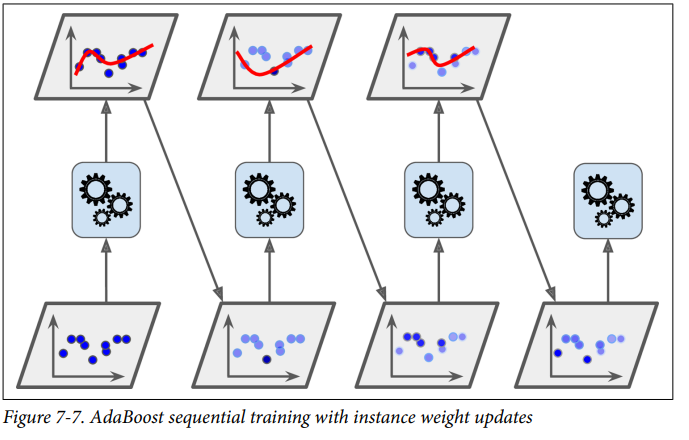

_Similarity to Gradient Descent_   
squential learning techniques (boosting) is similar to gradient descent, here instead of tweaking single predictor's parameters by decreasing cost function, we add new predictors to the ensemble with new weights. This _gradually_ makes the model better

___Note___: Drawback of boosting   
It cannot be parallelized (or only partially), since each predictor can only be trained after the previous predictor has been
trained and evaluated. As a result, it does not scale as well as bagging or pasting.


#### Mathematics behind adaboost

- Initially, each instance weight is $\frac{1}{m}$
- First, we calculate the weighted error of $j^{th}$ predictor

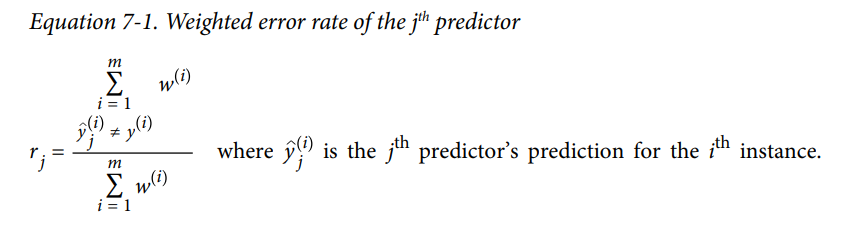

- Then, weighted error of $j^{th}$ predictor is used for calculating _weight of that predictor_ $\alpha_j$.
- We can set learning rate $\eta$ by ourselves (default=1)

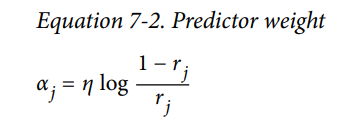

- Then, new weights are calculated 
- If the prediction $\hat{y}$ is correct then weight of that instance remains the same.
- If the prediction $\hat{y}$ is incorrect then weight of that instance becomes "$w^{(i)}e^{\alpha_j}$"

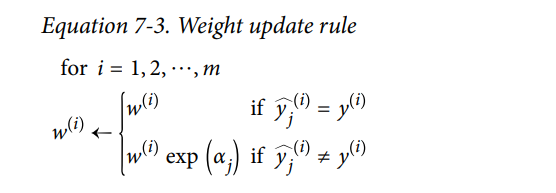

- Then weights are scaled by dividing $w^{(i)}$ by $\sum_{i=1}^{m}w^{(i)}$
- Then these new weights are assigned to each instance. And a new model is trained.
- Then same cycle repeats for that new model.  
 i.e weighted error rate calculated → predictor weight calculated → weights are selected → weights are calculated → new model is trained with new weights.

 - The algorithm stops once we get desired number of base predictors or get the perfect model

___How final predictions are made___ :  
Adaboost compute prediction of all predictors and then weights them using "$\alpha_j$". Then the predicted class is one with majority weighted class

___Note___
sklearn uses multiclass version of Adaboost called `SAMME` (_Stagewise Additive Modeling using Multiclass Exponetial log loss_) 

When there are just two classes, SAMME is equivalent to Adaboost.

If we are using predictors that can estimate probabilites, then this variant of SAMME is called `SAMME.R` (_Stagewise Additive Modeling using multiclass exponential loss with real valued prediction_) which uses predicted probabilities instead of predicted class for final prediction. And this generally results in better model


Adaboost class handles this automatically.

In [4]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

x,y = make_moons(n_samples=500,noise=0.3,random_state=42)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [11]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1,random_state=42),
    n_estimators=100,
    learning_rate=0.5,
)
adaboost.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=42),
                   learning_rate=0.5, n_estimators=100)

___How to handle overfitting___  
- If model is overfitting, try to reduce number of estimators
- Or regularize the base predictors strongly